In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
from sodapy import socrata
import geopandas as gpd
import contextily as ctx
import esda 
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_simulation
import libpysal as lps
import matplotlib.pyplot as plt 
import plotly.express as px


In [2]:
#import block grops data
gdf = gpd.read_file('C:/Users/ASUS/Downloads/acs2018_5yr_B01003_15000US060372711003.geojson')


In [3]:
gdf.head()

,geoid,name,B01003001,"B01003001, Error",geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",1806.0,332.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",1529.0,375.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",979.0,250.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",2093.0,410.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",1146.0,281.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [4]:
gdf.shape

(2516, 5)

In [5]:
#column selection & renaming
gdf = gdf[['geoid', 'B01003001', 'geometry']]
gdf.columns = ['FIPS', 'TotalPop', 'geometry']

In [6]:
gdf.tail()

,FIPS,TotalPop,geometry
2511,15000US060379800261,37.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,1113.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2515,16000US0644000,3959657.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [14]:
gdf['FIPS'] = gdf['FIPS'].str.replace('15000US', '')
gdf.tail()

,FIPS,TotalPop,geometry
2511,060379800261,37.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,060379800281,0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,060379800311,1113.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2515,16000US0644000,3959657.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


In [20]:
gdf.sort_values('TotalPop').head()

,FIPS,TotalPop,geometry
2509,060379800231,0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
2506,060379800201,0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
2358,060372772002,0.0,"MULTIPOLYGON (((-118.38597 33.94734, -118.3859..."
2514,060379902000,0.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2508,060379800221,0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."


In [22]:
gdf = gdf[gdf['TotalPop']>100]
gdf.head()

,FIPS,TotalPop,geometry
0,060371011101,1806.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,060371011102,1529.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,060371011103,979.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,060371011221,2093.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,060371011222,1146.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


In [24]:
gdf = gdf.to_crs(epsg=3857)

AttributeError: module 'contextily' has no attribute 'add_basemap'

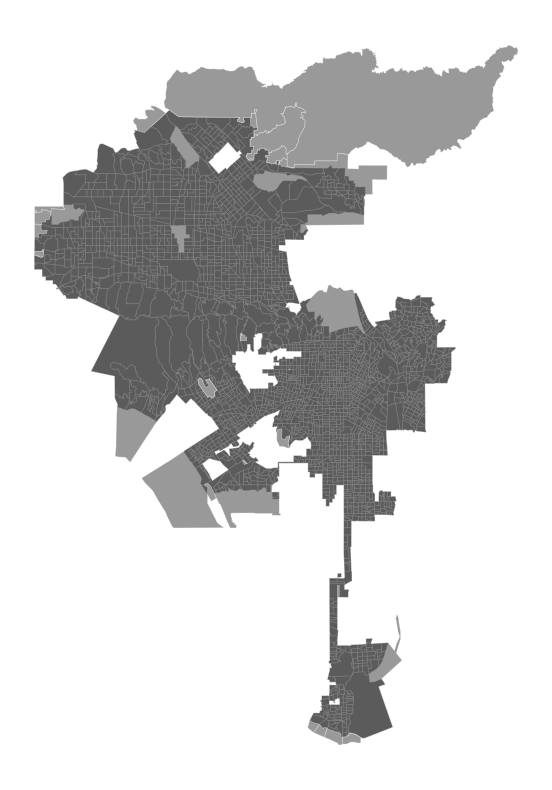

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,
        color='black',
        edgecolor='white',
        lw=0.5,
        alpha=0.4)
ax.axis('off')
ctx.add_basemap(ax, source=contextily.providers.CartoDB.Position)


In [64]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("amvf-fr72", 
                     limit=50000,
                     where = "arst_date between '2021-09-01T00:00:00' and '2021-09-20T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

NameError: name 'Socrata' is not defined